# 量子ビットを理解する（振幅増幅）

In [ ]:
!pip install -U pip
!pip install numpy matplotlib ipython 

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

## 初期状態の設定

In [337]:
#量子bit×2の生成

#量子bit1
phi_high  = math.pi*0.5 # ブロッホ球での|0>からの角度
shift_high= math.pi*0 # 位相差
#量子bit2
phi_low   = math.pi*0.5 # ブロッホ球での|0>からの角度
shift_low = math.pi*0 # 位相差

## 諸元算出

In [338]:
# 初期の各量子bit列の波
yo = np.arange(0,2*math.pi,0.01)

q_00 = (math.cos(phi_high/2) * math.cos(phi_low/2))*np.sin(yo)
q_01 = (math.cos(phi_high/2) * math.sin(phi_low/2))*np.sin(yo-shift_low)
q_10 = (math.sin(phi_high/2) * math.cos(phi_low/2))*np.sin(yo-shift_high)
q_11 = (math.sin(phi_high/2) * math.sin(phi_low/2))*np.sin(yo- ((shift_high+shift_low-math.pi*2) if (shift_high+shift_low >math.pi*2.0) else (shift_high+shift_low)))

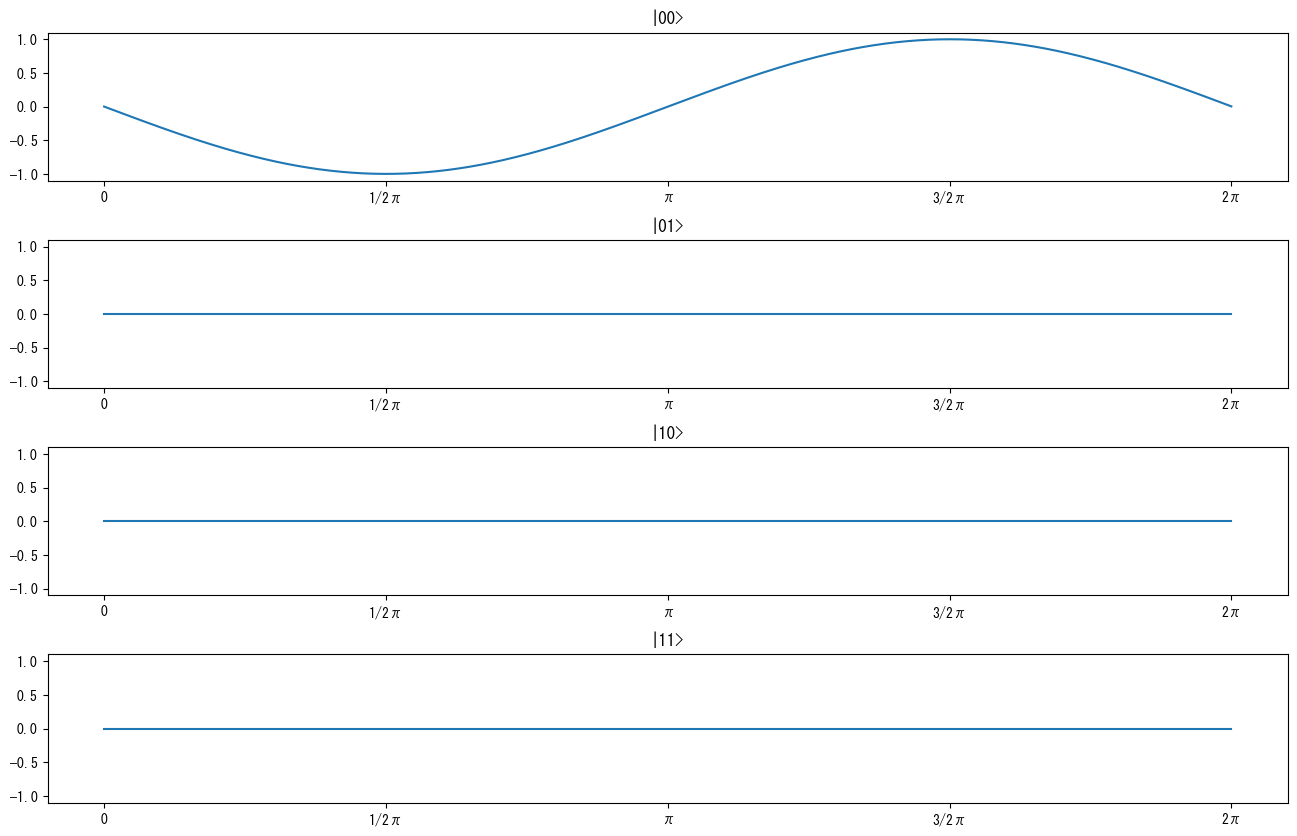

In [347]:
# 波描画

fig = plt.figure(figsize=(16,10)) #図のサイズを決定
ax_00 = fig.add_subplot(4,1,1)
ax_01 = fig.add_subplot(4,1,2)
ax_10 = fig.add_subplot(4,1,3)
ax_11 = fig.add_subplot(4,1,4)

ax_00.plot(yo,q_00)
ax_01.plot(yo,q_01)
ax_10.plot(yo,q_10)
ax_11.plot(yo,q_11)

ax_00.set_xticks([0, 1.57,3.14, 4.71,6.28], ["0", "1/2π", "π","3/2π","2π"])
ax_01.set_xticks([0, 1.57,3.14, 4.71,6.28], ["0", "1/2π", "π","3/2π","2π"])
ax_10.set_xticks([0, 1.57,3.14, 4.71,6.28], ["0", "1/2π", "π","3/2π","2π"])
ax_11.set_xticks([0, 1.57,3.14, 4.71,6.28], ["0", "1/2π", "π","3/2π","2π"])

ax_00.set_ylim(-1.1,1.1)
ax_01.set_ylim(-1.1,1.1)
ax_10.set_ylim(-1.1,1.1)
ax_11.set_ylim(-1.1,1.1)

ax_00.set_title("|00>")
ax_01.set_title("|01>")
ax_10.set_title("|10>")
ax_11.set_title("|11>")

plt.subplots_adjust(hspace=0.4)

plt.show()

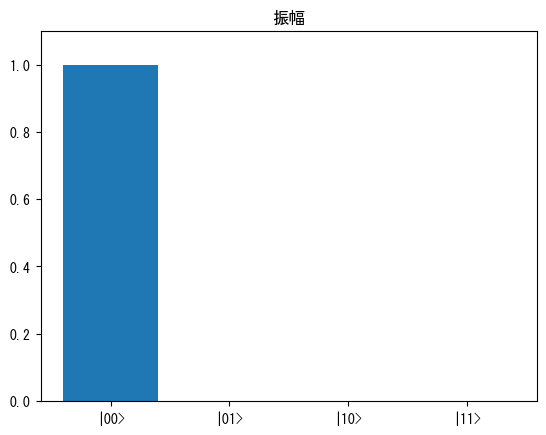

In [348]:
# 振幅描画

from matplotlib import rcParams
plt.rcParams["font.family"] = "MS Gothic"

fig = plt.figure()
ax = fig.subplots()

# データの準備
categories = ['|00>', '|01>', '|10>','|11>']
values = [max(q_00)**2, max(q_01)**2, max(q_10)**2, max(q_11)**2]

# 棒グラフの作成
ax.bar(categories, values)

# タイトルとラベルの追加
ax.set_title('振幅')
ax.set_ylim(0,1.1)

# グラフの表示
plt.show()

629
0


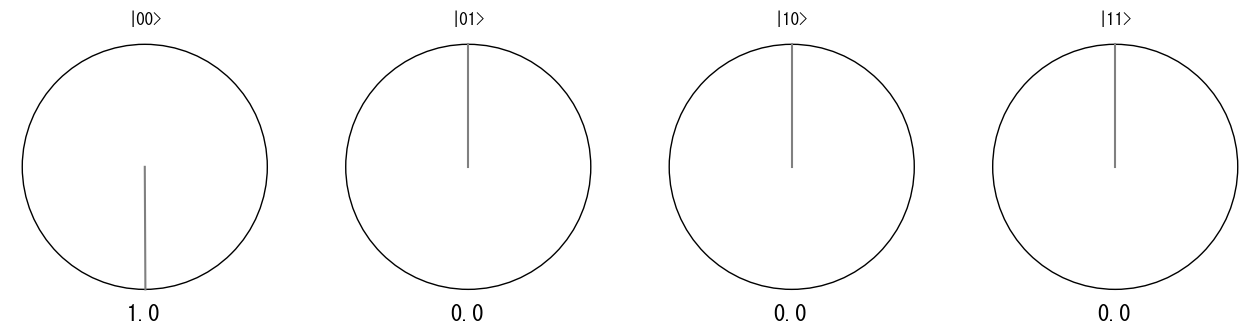

<Figure size 640x480 with 0 Axes>

In [345]:
# 位相描画

fig = plt.figure(figsize=(16,10)) #図のサイズを決定
ax_00 = fig.add_subplot(1,4,1)
ax_01 = fig.add_subplot(1,4,2)
ax_10 = fig.add_subplot(1,4,3)
ax_11 = fig.add_subplot(1,4,4)
fig = plt.figure()

shape00 = patches.Circle(xy=(0,0), radius=1, facecolor="white", edgecolor="black", linewidth=1)
shape01 = patches.Circle(xy=(0,0), radius=1, facecolor="white", edgecolor="black", linewidth=1)
shape10 = patches.Circle(xy=(0,0), radius=1, facecolor="white", edgecolor="black", linewidth=1)
shape11 = patches.Circle(xy=(0,0), radius=1, facecolor="white", edgecolor="black", linewidth=1)

lngt = len(q_00)
print(lngt)
s00 = s01 =s10 = s11 = 0
if max(q_00) >= 0.0001:
    for i in range(lngt*2):
        if q_00[i%lngt] <= 0.0:
            if q_00[(i+1)%lngt] >= 0.0:
                break
    s00 = i/lngt* 2*math.pi
if max(q_01) >= 0.0001:
     for i in range(lngt*2):
        if q_01[i%lngt] <= 0.0:
            if q_01[(i+1)%lngt] >= 0.0:
                break
     s01 = i/lngt * 2*math.pi
if max(q_10) >= 0.0001:
     for i in range(lngt*2):
        if q_10[i%lngt] <= 0.0:
            if q_10[(i+1)%lngt] >= 0.0:
                break
     s10 = i/lngt * 2*math.pi
if max(q_11) >= 0.0001:
     for i in range(lngt*2):
        if q_11[i%lngt] <= 0.0:
            if q_11[(i+1)%lngt] >= 0.0:
                break
     s11 = i/lngt * 2*math.pi
     print(i)

ax_00.add_patch(shape00)
ax_00.plot([0,np.sin(s00)],[0,np.cos(s00)],color='gray')
ax_00.set_xlim(-1.1,1.1)
ax_00.set_ylim(-1.1,1.1)
ax_00.set_title('|00>')
ax_00.set_aspect('equal')
ax_00.axis('off')
ax_00.text(-0.15,-1.25,str(round(s00/math.pi,2)),color='black',fontsize=16)

ax_01.add_patch(shape01)
ax_01.plot([0,np.sin(s01)],[0,np.cos(s01)],color='gray')
ax_01.set_xlim(-1.1,1.1)
ax_01.set_ylim(-1.1,1.1)
ax_01.set_aspect('equal')
ax_01.set_title('|01>')
ax_01.axis('off')
ax_01.text(-0.15,-1.25,str(round(s01/math.pi,2)),color='black',fontsize=16)

ax_10.add_patch(shape10)
ax_10.plot([0,np.sin(s10)],[0,np.cos(s10)],color='gray')
ax_10.set_xlim(-1.1,1.1)
ax_10.set_ylim(-1.1,1.1)
ax_10.set_aspect('equal')
ax_10.set_title('|10>')
ax_10.axis('off')
ax_10.text(-0.15,-1.25,str(round(s10/math.pi,2)),color='black',fontsize=16)

ax_11.add_patch(shape11)
ax_11.plot([0,np.sin(s11)],[0,np.cos(s11)],color='gray')
ax_11.set_xlim(-1.1,1.1)
ax_11.set_ylim(-1.1,1.1)
ax_11.set_aspect('equal')
ax_11.set_title('|11>')
ax_11.axis('off')
ax_11.text(-0.15,-1.25,str(round(s11/math.pi,2)),color='black',fontsize=16)

plt.show()

In [296]:
## グローバル位相のキャンセル
q_00,q_01,q_10,q_11 = cancel_global_shift(q_00,q_01,q_10,q_11)

## アダマールゲート
### 上位ビットに対するゲート操作
$
H
\otimes
I =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1
\otimes
I
&
1
\otimes
I
\\
1
\otimes
I
&
-1
\otimes
I
\end{pmatrix}
=
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{pmatrix}
$
<br>
### 下位ビットに対するゲート操作
$
I
\otimes
H =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1
\otimes
H
&
0
\otimes
H
\\
1
\otimes
H
&
0
\otimes
H
\end{pmatrix}
=
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 & 0 & 0 \\
1 & -1 & 0 & 0 \\
0 & 0 & 1 & 1 \\
0 & 0 & 1 & -1
\end{pmatrix}
$
<br>
### 上下位ビットに対するゲート操作
$
H
\otimes
H =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1
\otimes
H
&
1
\otimes
H
\\
1
\otimes
H
&
-1
\otimes
H
\end{pmatrix}
=
\frac{1}{2}
\begin{pmatrix}
1 & 1 & 1 & 1 \\
1 & -1 & 1 & -1 \\
1 & 1 & -1 & -1 \\
1 & -1 & -1 & 1
\end{pmatrix}
$

In [23]:
#to high bit
q_00,q_10 = h_gate(q_00,q_10)
q_01,q_11 = h_gate(q_01,q_11)

In [ ]:
#to low bit
q_00,q_01 = h_gate(q_00,q_01)
q_10,q_11 = h_gate(q_10,q_11)

In [ ]:
#to All bit
q_00_ = (q_00+q_01+q_10+q_11)*0.5
q_01_ = (q_00-q_01+q_10-q_11)*0.5
q_10_ = (q_00+q_01-q_10-q_11)*0.5
q_11_ = (q_00-q_01-q_10+q_11)*0.5

q_00 = q_00_
q_01 = q_01_
q_10 = q_10_
q_11 = q_11_

In [330]:
def hh_gate(q00,q01,q10,q11):
    q00_ = (q00+q01+q10+q11)*0.5
    q01_ = (q00-q01+q10-q11)*0.5
    q10_ = (q00+q01-q10-q11)*0.5
    q11_ = (q00-q01-q10+q11)*0.5
    return q00_,q01_,q10_,q11_

## 制御ユニタリーゲート

### SWAP
$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$

In [96]:
#SWAP
q_01,q_10 = x_gate(q_01,q_10)

### CX(high bit control)
$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
$

### CX(low bit control)
$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{pmatrix}
$

In [26]:
#cx(Highをコントロールビット、lowを標的ビットとした場合)
q_10,q_11 = x_gate(q_10,q_11)

In [94]:
#cx(Highを標的ビット、lowをコントロールビットとした場合)
q_01,q_11 = x_gate(q_01,q_11)

## X$\otimes$Xゲート
$
X
\otimes
X =
\begin{pmatrix}
0
\otimes
X
&
1
\otimes
X
\\
1
\otimes
X
&
0
\otimes
X
\end{pmatrix}
=
\begin{pmatrix}
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0
\end{pmatrix}
$

In [ ]:
q_01,q_10 = x_gate(q_01,q_10)
q_00,q_11 = x_gate(q_00,q_11)

In [331]:
def xx_gate(q00,q01,q10,q11):
    q01_,q10_ = x_gate(q01,q10)
    q00_,q11_ = x_gate(q00,q11)
    return q00_,q01_,q10_,q11_

### CZ(high bit control)
$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix}
$

### CZ(low bit control)
$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$

In [ ]:
#cz(Highをコントロールビット、lowを標的ビットとした場合)
q_11 = -q_11

In [ ]:
#cz(Lowをコントロールビット、Highを標的ビットとした場合)
q_01 = -q_01

In [328]:
#汎用Zゲート 
def z_gate(q00,q01,q10,q11,target):
    if target=='00':
      q00_ = -q00
      q01_ = q01
      q10_ = q10
      q11_ = q11
    elif target=='01':
      q00_ = q00
      q01_ = -q01
      q10_ = q10
      q11_ = q11
    elif target=='10':
      q00_ = q00
      q01_ = q01
      q10_ = -q10
      q11_ = q11 
    elif target=='11':
      q00_ = q00
      q01_ = q01
      q10_ = q10
      q11_ = -q11
    else:
      q00_ = q00
      q01_ = q01
      q10_ = q10
      q11_ = q11
      print('CZ gate not changed')
    return q00_,q01_,q10_,q11_

In [342]:
# call CZ gate
q_00,q_01,q_10,q_11 = z_gate(q_00,q_01,q_10,q_11,'11')

## Grover

In [332]:
def grover(q00,q01,q10,q11):
    q00_,q01_,q10_,q11_ = hh_gate(q00,q01,q10,q11)
    q00_,q01_,q10_,q11_ = xx_gate(q00_,q01_,q10_,q11_)
    q00_,q01_,q10_,q11_ = z_gate(q00_,q01_,q10_,q11_,'11')
    q00_,q01_,q10_,q11_ = xx_gate(q00_,q01_,q10_,q11_)
    q00_,q01_,q10_,q11_ = hh_gate(q00_,q01_,q10_,q11_)
    return q00_,q01_,q10_,q11_

In [346]:
#  call Grover
q_00,q_01,q_10,q_11 = grover(q_00,q_01,q_10,q_11)

## ゲート操作

### アダマールゲート
$$
H =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

In [22]:
#アダマール変換 
# やっていること：|1>を反転させ、反時計周りに1/4π回転させる
def h_gate(x,z):
    x_ = ( x + z)/2**0.5
    z_ = ( x - z)/2**0.5
    return x_,z_

### Tゲート
$$
T =
\begin{pmatrix}
1 & 0 \\
0 & exp(\frac{i\pi}{4})
\end{pmatrix}
$$

In [83]:
#Tゲート変換 
# やっていること：|1>の位相を1/4π（45°）進める
def t_gate(x,z):
    x_ = x
    z_ = np.roll(z,len(z)//8)
    return x_,z_

### Sゲート
$$
S =
\begin{pmatrix}
1 & 0 \\
0 & exp(\frac{i\pi}{2})
\end{pmatrix}
$$

In [51]:
#Sゲート変換 
# やっていること：|1>の位相を1/2π（90°）進める
def s_gate(x,z)
    x_ = x
    z_ = np.roll(z,len(z)//4)
    return x_,z_

### Xゲート
$$
X =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$

In [329]:
#Xゲート変換 
# やっていること：|0>←→|1>を交換する
def x_gate(x,z):
    x_ = z
    z_ = x
    return x_,z_

### Yゲート
$$
Y =
\begin{pmatrix}
0 & exp(\frac{-i\pi}{2}) \\
exp(\frac{i\pi}{2})  & 0
\end{pmatrix}
$$

In [69]:
#Yゲート変換 
# やっていること：|0>→i|1>、|1>→-i|0>
def y_gate(x,z):
    x_ = np.roll(z,len(z)//4)
    z_ = np.roll(x,-len(x)//4)
    return x_,z_

### Zゲート
$$
Z =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

In [46]:
#Zゲート変換 
# やっていること：|1>の符号を反転させる
def z_gate(x,z):
    x_ = x
    z_ = -z
    return x_,z_

### グローバル位相のキャンセル

In [195]:
def cancel_global_shift(x00,x01,x10,x11):

    lngt = len(x00)
    if max(x00) >= 0.0001:
        for i in range(lngt*2):
            if x00[i%lngt] <= 0.0:
                if x00[(i+1)%lngt] >= 0.0:
                    break
    elif max(x01) >= 0.0001:
         for i in range(lngt*2):
            if x01[i%lngt] <= 0.0:
                if x01[(i+1)%lngt] >= 0.0:
                    break
    elif max(x10) >= 0.0001:
         for i in range(lngt*2):
            if x10[i%lngt] <= 0.0:
                if x10[(i+1)%lngt] >= 0.0:
                    break
    else:
         for i in range(lngt*2):
            if x11[i%lngt] <= 0.0:
                if x11[(i+1)%lngt] >= 0.0:
                    break
    x00_ = np.roll(x00,-i)
    x01_ = np.roll(x01,-i)
    x10_ = np.roll(x10,-i)
    x11_ = np.roll(x11,-i)
    return x00_,x01_,x10_,x11_